Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
pd.pandas.set_option("display.max_columns", None)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

from scipy.sparse import hstack

Importing Data Set

In [2]:
data = pd.read_csv("Dataset .csv")

df = data.copy()

In [3]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Dropping the unnecessary columns

In [6]:
df = df.drop(columns = ["Switch to order menu", "Restaurant ID", "Address", "Locality", "Locality Verbose", "Rating color"  ])


In [7]:
df.head()

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314
1,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270
3,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229


Handeling the missing values

In [8]:
df.isnull().sum()

,0
Restaurant Name,0
Country Code,0
City,0
Longitude,0
Latitude,0
Cuisines,9
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0


In [9]:
#filling the missing
df["Cuisines"].fillna(df["Cuisines"].mode()[0], inplace = True)

<ipython-input-9-d8f59cf8efdb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna(df["Cuisines"].mode()[0], inplace = True)


In [10]:
df.isnull().sum()

,0
Restaurant Name,0
Country Code,0
City,0
Longitude,0
Latitude,0
Cuisines,0
Average Cost for two,0
Currency,0
Has Table booking,0
Has Online delivery,0


In [11]:
df.value_counts().sum()

9551

Statistics of the Data Set

In [12]:
#For numerical Data

data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
#for non numerical data

data.describe(include = "object")

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


Handelling the Outliers in the Data Set

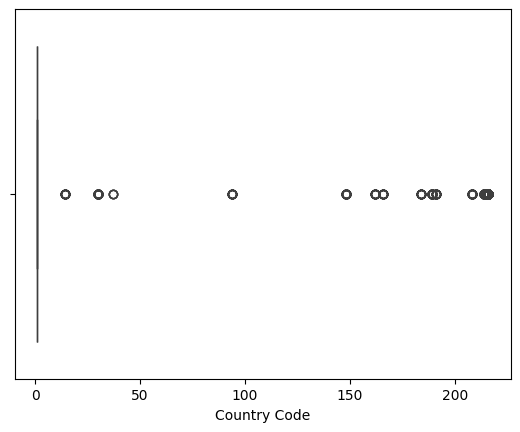

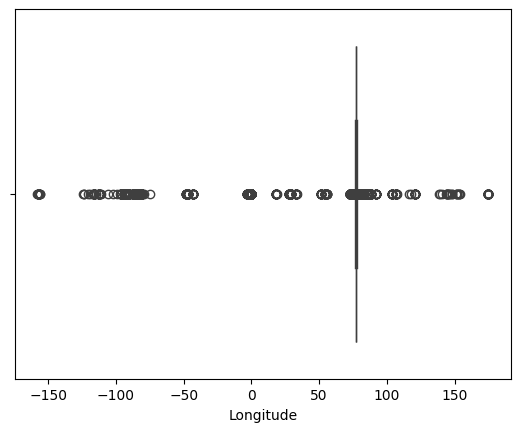

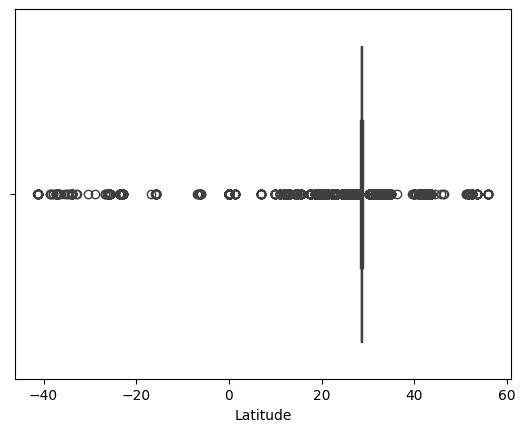

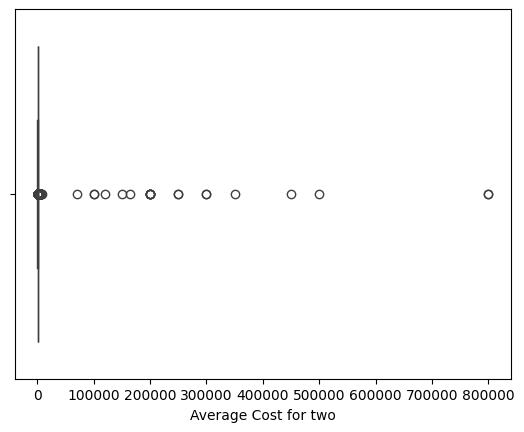

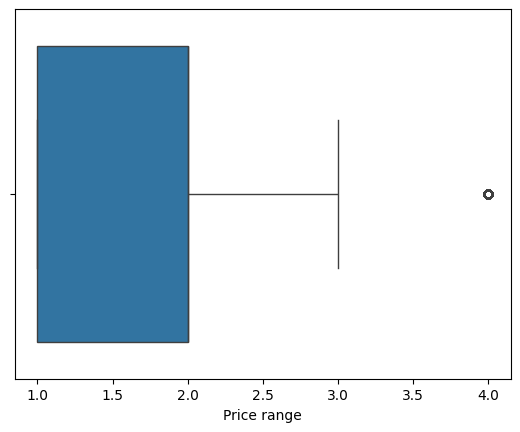

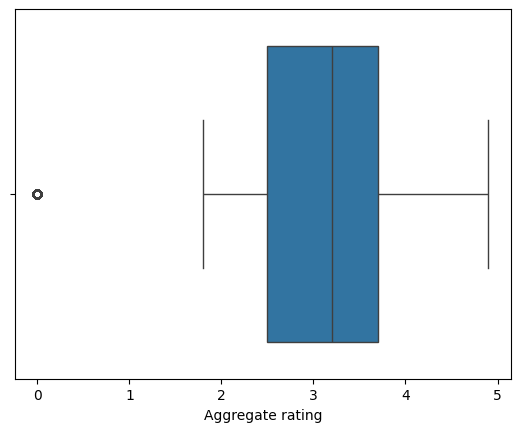

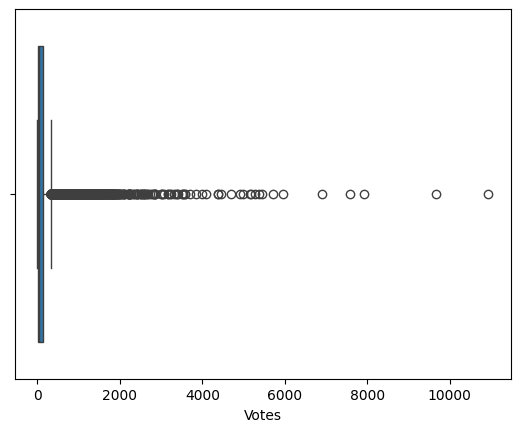

In [14]:
#boxplot to visualize the outliers

import warnings
warnings.filterwarnings("ignore")

for i in df.select_dtypes(include = "number").columns:
  sns.boxplot(data = df, x=i)
  plt.show()

In [15]:
#now treating outliers
def wisker(col):
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  return lower_bound, upper_bound

In [16]:
for i in df.select_dtypes(include = "number").columns:
  lower_bound, upper_bound = wisker(i)
  df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
  df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

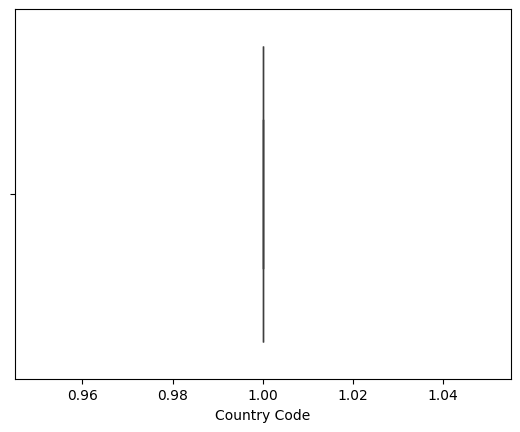

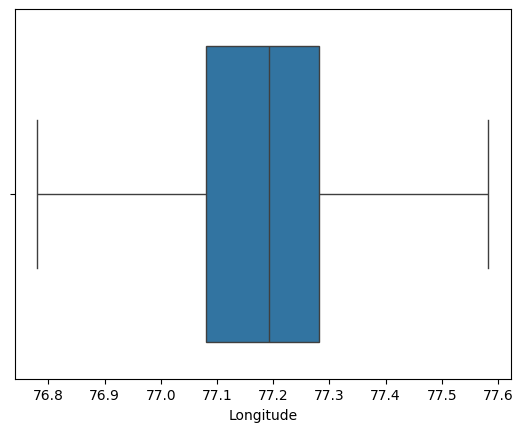

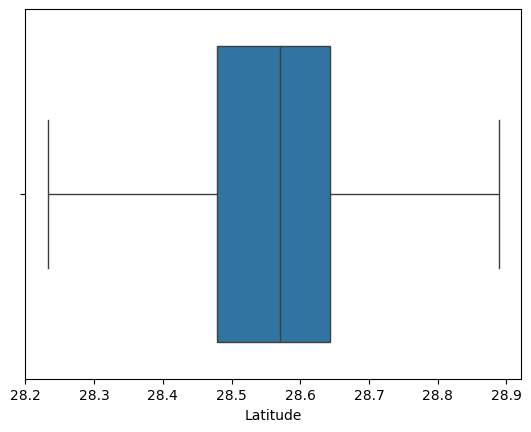

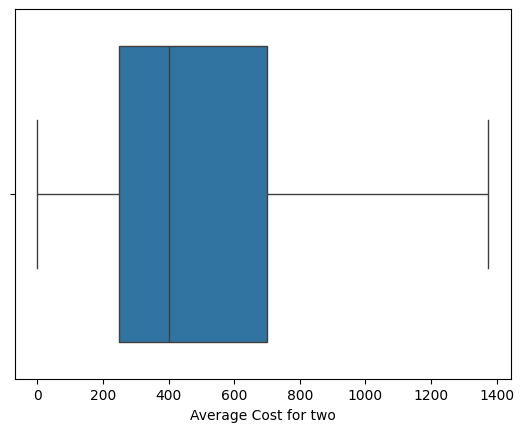

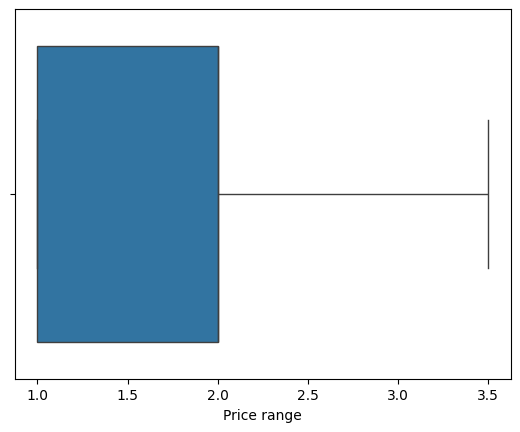

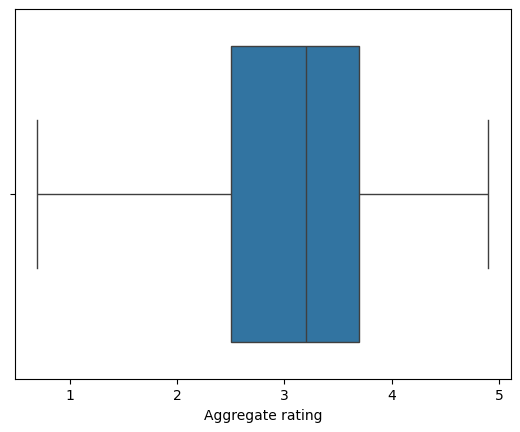

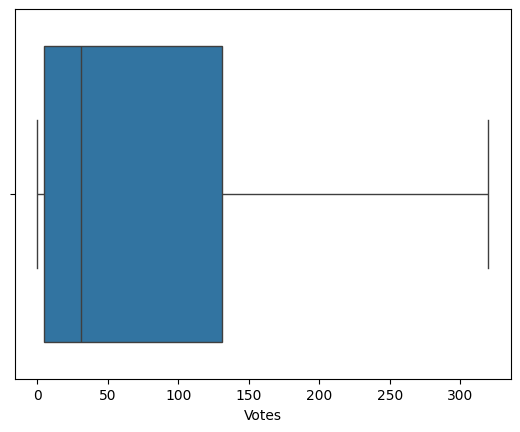

In [17]:
for i in df.select_dtypes(include = "number").columns:
  sns.boxplot(data = df, x=i)
  plt.show()

Handeling the Duplicate Values

In [18]:
df.drop_duplicates(inplace = True)


In [19]:
df.duplicated().sum()

0

Converting "Yes" and "No" Columns to "1" and "0"


In [20]:
#Dictionary for conversion
N_Conversion = {"No": 0, "Yes": 1}

#List of columns to convert
columns_to_convert = ["Has Table booking", "Has Online delivery", "Is delivering now"]

#Modify the DataFrame in place
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: N_Conversion.get(x))

In [21]:
df.head()

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,1.0,Makati City,77.583001,28.232644,"French, Japanese, Desserts",1100.0,Botswana Pula(P),1,0,0,3.0,4.8,Excellent,314.0
1,Izakaya Kikufuji,1.0,Makati City,77.583001,28.232644,Japanese,1200.0,Botswana Pula(P),1,0,0,3.0,4.5,Excellent,320.0
2,Heat - Edsa Shangri-La,1.0,Mandaluyong City,77.583001,28.232644,"Seafood, Asian, Filipino, Indian",1375.0,Botswana Pula(P),1,0,0,3.5,4.4,Very Good,270.0
3,Ooma,1.0,Mandaluyong City,77.583001,28.232644,"Japanese, Sushi",1375.0,Botswana Pula(P),0,0,0,3.5,4.9,Excellent,320.0
4,Sambo Kojin,1.0,Mandaluyong City,77.583001,28.232644,"Japanese, Korean",1375.0,Botswana Pula(P),1,0,0,3.5,4.8,Excellent,229.0


Combine all categorical variables into a single text feature

In [22]:
df['combined_features'] = (
    df['Cuisines'] + " " +
    df['City'] + " " +
    df['Currency'] + " " +
    df['Rating text']
)


Normalize numerical features

In [23]:
#Normalize numerical features
Scaler = MinMaxScaler()
df[["Aggregate rating", "Price range",
    "Country Code", "Longitude", "Latitude",
    "Average Cost for two"]] = Scaler.fit_transform(df[["Aggregate rating", "Price range",
                                                         "Country Code", "Longitude", "Latitude",
                                                         "Average Cost for two"]])

Generate a TF-IDF matrix for text features

In [24]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

Combine TF-IDF matrix and normalized numerical features

In [25]:
numeric_features = df[["Aggregate rating", "Price range","Country Code", "Longitude", "Latitude","Average Cost for two"]].values
combined_matrix = hstack([tfidf_matrix, numeric_features])

Calculate cosine similarity

In [26]:
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

Recommendation Function

In [27]:
def get_recommendations(input_type, input_value, cosine_sim=cosine_sim, df=df):
    """
    Get recommendations based on user input type and value.

    Parameters:
        input_type (str): Type of input ('Restaurant Name', 'Cuisines', 'City', 'Aggregate rating').
        input_value (str/int/float): The value for the specified input type.
        cosine_sim (array): Precomputed cosine similarity matrix.
        df (DataFrame): The dataset containing restaurant information.

    Returns:
        DataFrame: Top 10 similar restaurants with their details.
    """
    # Strip the whitespace from input values to avoid issue with extra spaces or tabs
    input_value = str(input_value).strip()

    if input_type == 'Restaurant Name':
        idx = df[df['Restaurant Name'] == input_value].index[0]
    elif input_type == 'Cuisines':
        idx = df[df['Cuisines'].str.contains(input_value, case=False)].index[0]
    elif input_type == 'City':
        idx = df[df['City'] == input_value].index[0]
    elif input_type == 'Aggregate rating':
        # Find the closest match for aggregate rating
        idx = (df['Aggregate rating'] - input_value).abs().idxmin()
    else:
        raise ValueError("Invalid input type. Choose from 'Restaurant Name', 'Cuisines', 'City', or 'Aggregate rating'.")

    # Get similarity scores for the selected restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the selected restaurant itself

    # Get indices of top 10 similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]

    # Return a DataFrame with top 10 recommendations
    return df[['Restaurant Name', 'Cuisines', 'City', 'Aggregate rating', 'Price range']].iloc[restaurant_indices]


Example Usage

In [28]:
df.sample(1)

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,combined_features
5680,Green Chick Chop,0.0,New Delhi,0.256019,0.57086,"Raw Meats, North Indian, Fast Food",0.254545,Indian Rupees(Rs.),0,0,0,0.0,0.0,Not rated,0.0,"Raw Meats, North Indian, Fast Food New Delhi I..."


In [29]:
print("Select a recommendation type:")
print("1. Restaurant Name")
print("2. Cuisines")
print("3. City")
print("4. Aggregate Rating")
choice = input("Enter the number corresponding to your choice: ")

if choice == '1':
    restaurant_name = input("Enter the Restaurant Name: ")
    recommendations = get_recommendations('Restaurant Name', restaurant_name)
elif choice == '2':
    cuisine = input("Enter the Cuisine (e.g., Japanese): ")
    recommendations = get_recommendations('Cuisines', cuisine)
elif choice == '3':
    City = input("Enter the Location (e.g., London): ")
    recommendations = get_recommendations('City', City)
elif choice == '4':
    rating = float(input("Enter the Aggregate Rating (e.g., 4.5): "))
    recommendations = get_recommendations('Aggregate rating', rating)
else:
    print("Invalid choice.")
    recommendations = None

if recommendations is not None:
    print("\nTop 10 Recommendations:")
    print(recommendations)

Select a recommendation type:
1. Restaurant Name
2. Cuisines
3. City
4. Aggregate Rating
Enter the number corresponding to your choice: 1
Enter the Restaurant Name: Green Chick Chop

Top 10 Recommendations:
          Restaurant Name                            Cuisines       City  \
1053     Green Chick Chop  Raw Meats, North Indian, Fast Food  Faridabad   
1012     Green Chick Chop  Raw Meats, North Indian, Fast Food  Faridabad   
1032  Republic of Chicken                Raw Meats, Fast Food  Faridabad   
951      Green Chick Chop  Raw Meats, North Indian, Fast Food  Faridabad   
1082       Indian Gourmet    North Indian, Chinese, Raw Meats  Faridabad   
6933     Green Chick Chop  Raw Meats, North Indian, Fast Food  New Delhi   
4408     Green Chick Chop  Raw Meats, North Indian, Fast Food  New Delhi   
2596     Green Chick Chop  Raw Meats, North Indian, Fast Food  New Delhi   
5251     Green Chick Chop  Raw Meats, North Indian, Fast Food  New Delhi   
5913     Green Chick Chop  Raw Me